In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from pysr import PySRRegressor
from IPython.display import HTML
from matplotlib import pyplot as plt

from hyperfit.linfit import LinFit
import functions
import old_relations
import new_relations
from ltsfit import lts_planefit

## Check the scatter with Milky Way

In [10]:
df=pd.read_csv('SMBH_Data_0504.csv',header=1)
paras=['tan_phi','log_v_max']
paras.append('M_BH')
stds=[]
for para in paras:
    stds.append(para+'_std')

    
df_=df[paras+stds].dropna(axis='index',how='any')
df_=df_[paras+stds]
    
print(len(df_))

42


In [15]:
np.median((df_['tan_phi']))

0.23731179349999998

In [16]:
np.median(10**df_['log_v_max'])

210.4999999920144

In [18]:
normalization=np.array([np.median((df_['tan_phi'])),np.median(10**df_['log_v_max'])])
normalization

array([  0.23731179, 210.49999999])

In [19]:
normalization[1]=np.log10(normalization[1])
    
xs=np.array(df_[paras]).transpose()
errs=np.array(df_[stds]).transpose()
cov=np.zeros((len(paras),len(paras),len(df_)))

for i in range(len(normalization)):
    xs[i]=xs[i]-normalization[i]
    
for i in range(len(paras)):
    cov[i,i,:]=errs[i]**2

In [20]:
normalization

array([0.23731179, 2.3232521 ])

In [21]:
bounds = ((-5.7, -5.6),(3.9, 4.1),(7.44,7.45),(1.0e-5, 1.0))

/home/zj448/miniconda3/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]


[-5.57032607  3.95495004  7.313977    0.28083208] [0.05801008 0.05669685 0.0598425  0.0559419 ]


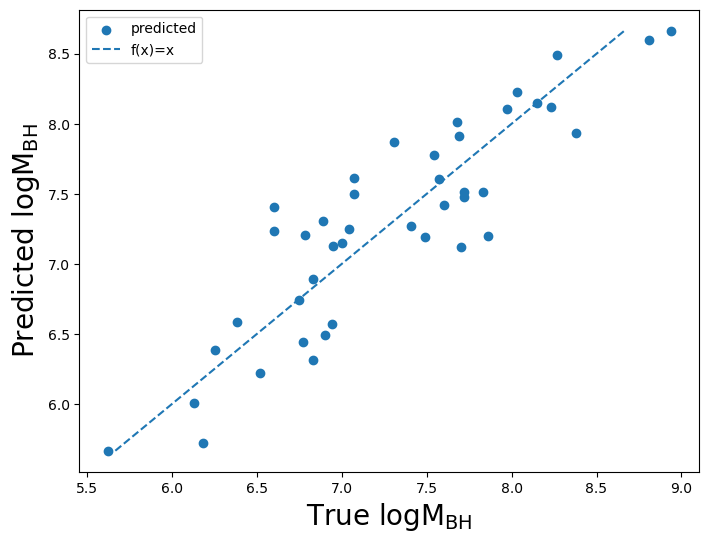

rmse: 0.32144196578059975
un-weight rmse: 0.3496537914394266


(array([-5.57032607,  3.95495004,  7.313977  ,  0.28083208]),
 array([0.05801008, 0.05669685, 0.0598425 , 0.0559419 ]))

In [22]:
hf = LinFit(xs, cov)

mcmc_samples, mcmc_lnlike = hf.emcee(bounds, verbose=False)
print(np.mean(mcmc_samples, axis=1), np.std(mcmc_samples, axis=1))



c=np.mean(mcmc_samples, axis=1)
y=xs[-1]
y_pred=0
for i in range(len(c)-2):
    y_pred+=c[i]*xs[i]
y_pred+=c[-2]

plt.figure(figsize=(8,6))
plt.scatter(y,y_pred,label='predicted')
plt.plot(np.linspace(y_pred.min(),y_pred.max()),np.linspace(y_pred.min(),y_pred.max()),ls='--',label='f(x)=x')
plt.xlabel(r'True $\rm{log} M_{BH}$',fontsize=20)
plt.ylabel(r'Predicted $\rm{log} M_{BH}$',fontsize=20)
plt.legend()
plt.show()

w = 1/errs[-1]**2
print('rmse:',np.sqrt(np.average((y-y_pred)**2,weights=w)))
print('un-weight rmse:',np.sqrt(np.average((y-y_pred)**2)))
np.mean(mcmc_samples, axis=1), np.std(mcmc_samples, axis=1)

41


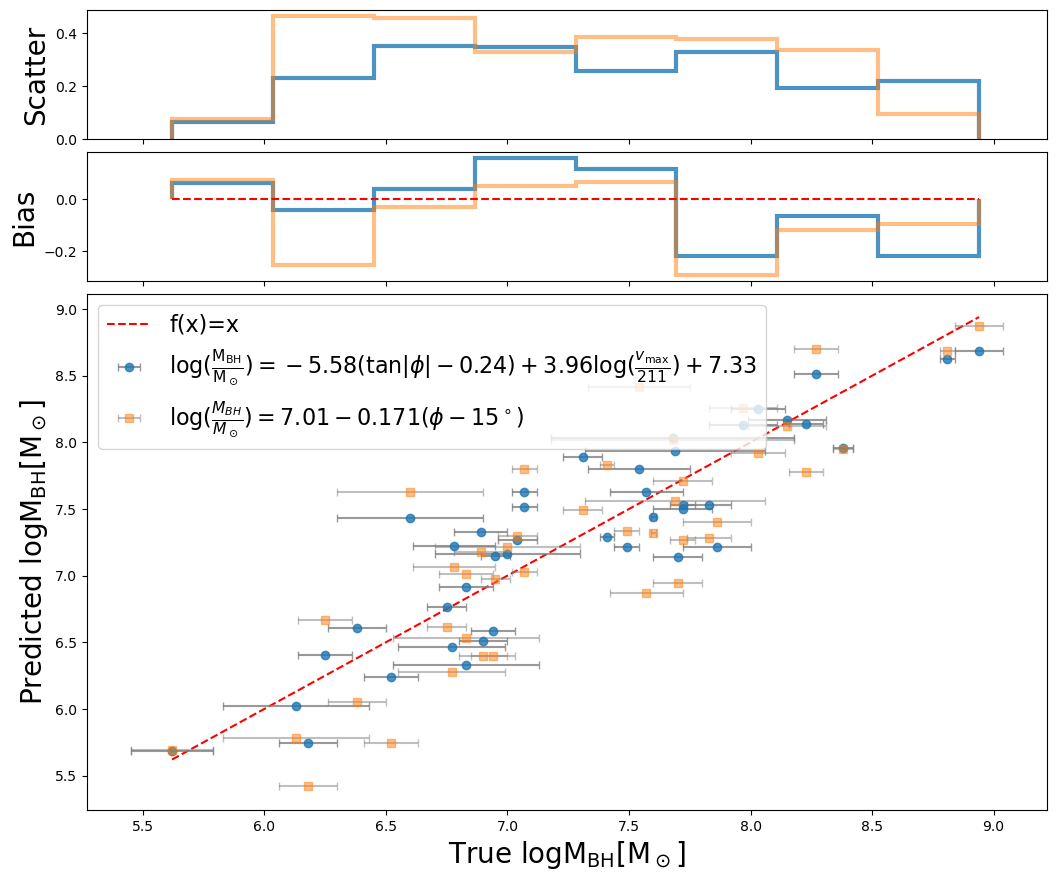

N-D relation wrmse: 0.2327150003130202
1-D relation wrmse: 0.3311469717427208


In [53]:
functions.plot_relation(['tan_phi','log_v_max','bri25'],phi_v_normalized_relation,label=r'$\log (\frac{\mathrm{M}_\mathrm{BH}}{\mathrm{M}_\odot})= -5.58 (\tan|\phi| - 0.24) + 3.96 \log(\frac{v_\mathrm{max}}{211}) + 7.33$',
                reference='tan_phi',reference_relation=old_relations.m_phi_relation,reference_name=r'$\log (\frac{{M}_{BH}}{{M}_\odot})= 7.01-0.171(\phi-15^\circ)$',
                       loc='upper left')

42


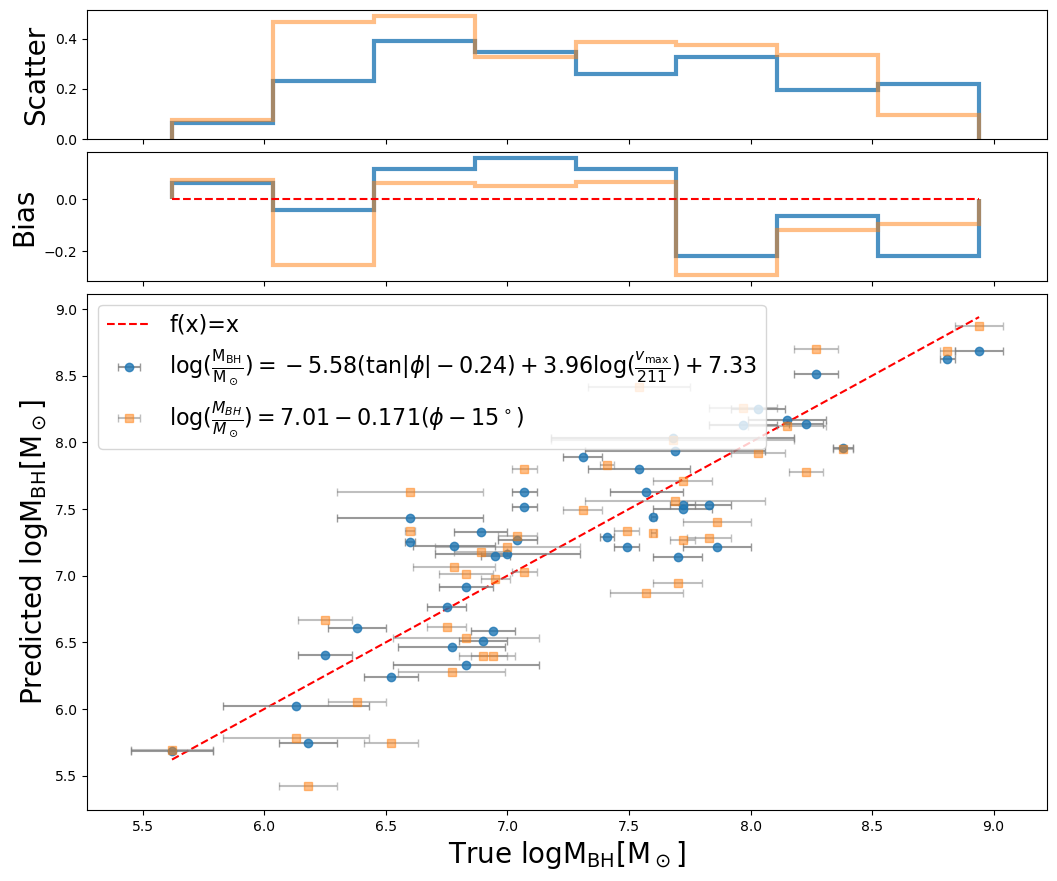

N-D relation wrmse: 0.3195867016049452
1-D relation wrmse: 0.4058537080339953


In [54]:
functions.plot_relation(['tan_phi','log_v_max'],phi_v_normalized_relation,label=r'$\log (\frac{\mathrm{M}_\mathrm{BH}}{\mathrm{M}_\odot})= -5.58 (\tan|\phi| - 0.24) + 3.96 \log(\frac{v_\mathrm{max}}{211}) + 7.33$',
                reference='tan_phi',reference_relation=old_relations.m_phi_relation,reference_name=r'$\log (\frac{{M}_{BH}}{{M}_\odot})= 7.01-0.171(\phi-15^\circ)$',
                       loc='upper left')

42


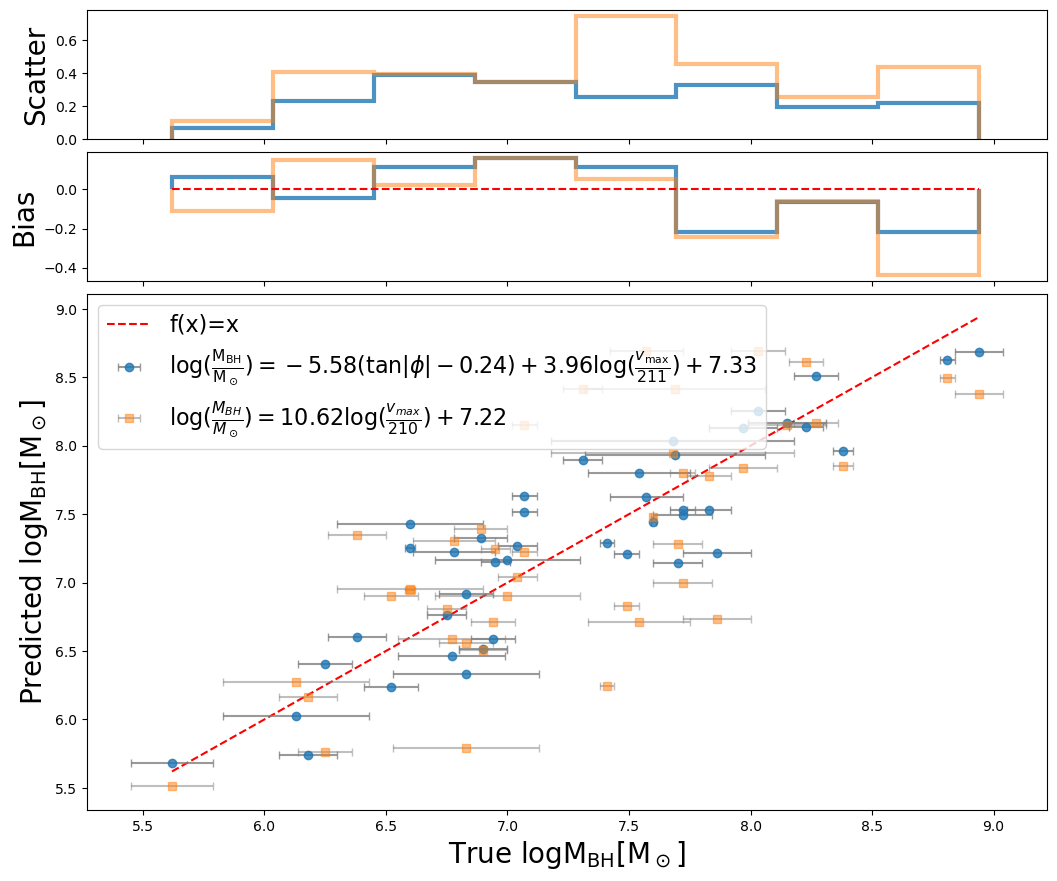

N-D relation wrmse: 0.3195867016049452
1-D relation wrmse: 0.4278506220992225


In [55]:
functions.plot_relation(['tan_phi','log_v_max'],phi_v_normalized_relation,label=r'$\log (\frac{\mathrm{M}_\mathrm{BH}}{\mathrm{M}_\odot})= -5.58 (\tan|\phi| - 0.24) + 3.96 \log(\frac{v_\mathrm{max}}{211}) + 7.33$',
                reference='log_v_max',reference_relation=old_relations.m_vmax_relation,reference_name=r'$\log (\frac{{M}_{BH}}{{M}_\odot})= 10.62 \log (\frac{v_{max}}{210})+7.22$',
                       loc='upper left')

## normalized

\begin{equation}
\log (\frac{\text{M}_\text{BH}}{\text{M}_\odot})= -5.58 (\tan|\phi| - 0.24) + 3.96 \log(\frac{v_\text{max}}{211}) + 7.33
\end{equation}

$\epsilon= 0.22035827$

$\epsilon= 0.22$

\begin{equation}
\log (\frac{\text{M}_\text{BH}}{\text{M}_\odot})= (-5.58\pm{0.056}) (\tan|\phi| - 0.24) + (3.96\pm{0.058}) \log(\frac{v_\text{max}}{211}) + (7.33\pm{0.055})
\end{equation}

$\epsilon= 0.22035827\pm0.06387363$

$\epsilon= 0.22\pm0.064$

In [19]:
def phi_v_normalized_relation(tan_phi,log_v_max,place_holder=0):
    norm_phi = 0.2382336
    norm_v = 2.32428246
    tan_phi = tan_phi - norm_phi
    log_v_max = log_v_max - norm_v
    a = -5.58189854
    b = 3.95991274
    c = 7.33367282
    return a*tan_phi+b*log_v_max+c

41


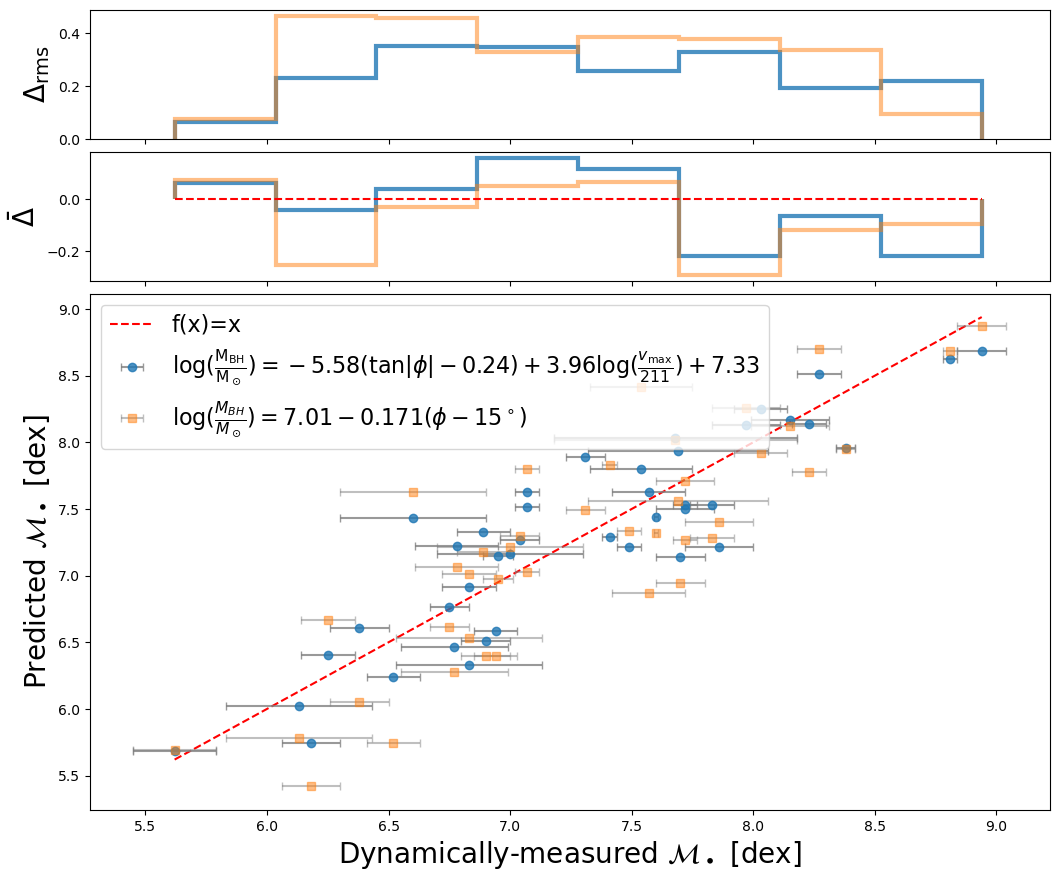

N-D relation wrmse: 0.2327150003130202
1-D relation wrmse: 0.3311469717427208


In [20]:
functions.plot_relation(['tan_phi','log_v_max','bri25'],phi_v_normalized_relation,label=r'$\log (\frac{\mathrm{M}_\mathrm{BH}}{\mathrm{M}_\odot})= -5.58 (\tan|\phi| - 0.24) + 3.96 \log(\frac{v_\mathrm{max}}{211}) + 7.33$',
                reference='tan_phi',reference_relation=old_relations.m_phi_relation,reference_name=r'$\log (\frac{{M}_{BH}}{{M}_\odot})= 7.01-0.171(\phi-15^\circ)$',
                       loc='upper left')

41


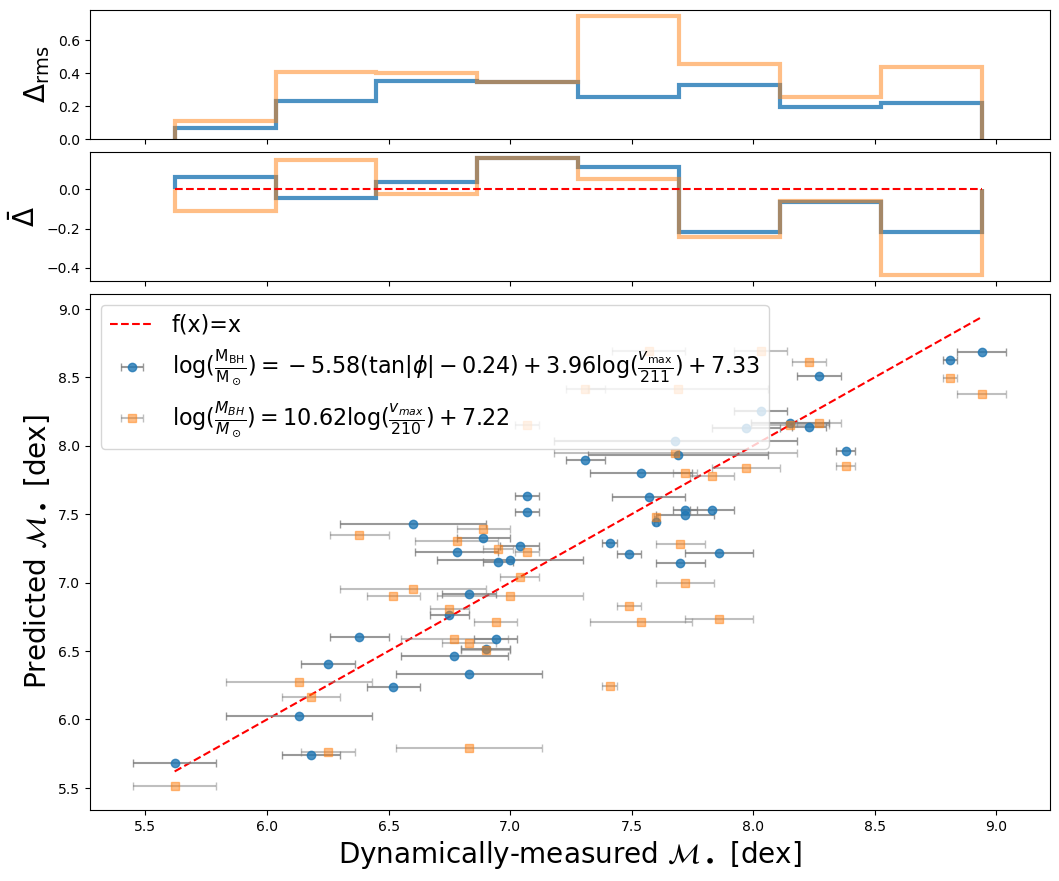

N-D relation wrmse: 0.2327150003130202
1-D relation wrmse: 0.43826998334985934


In [21]:
functions.plot_relation(['tan_phi','log_v_max','bri25'],phi_v_normalized_relation,label=r'$\log (\frac{\mathrm{M}_\mathrm{BH}}{\mathrm{M}_\odot})= -5.58 (\tan|\phi| - 0.24) + 3.96 \log(\frac{v_\mathrm{max}}{211}) + 7.33$',
                reference='log_v_max',reference_relation=old_relations.m_vmax_relation,reference_name=r'$\log (\frac{{M}_{BH}}{{M}_\odot})= 10.62 \log (\frac{v_{max}}{210})+7.22$',
                       loc='upper left')

In [11]:
df_

,tan_phi,log_v_max,M_BH,tan_phi_std,log_v_max_std,M_BH_std
96,0.305731,2.184691,6.25,0.074430,0.019870,0.11
99,0.412170,2.292256,6.52,0.034711,0.006647,0.11
101,0.232707,2.296665,6.60,0.011039,0.013160,0.02
103,0.149451,2.409933,8.15,0.023196,0.010139,0.16
104,0.245624,2.292256,7.00,0.042564,0.006647,0.30
105,0.282971,2.461093,7.57,0.081059,0.007706,0.15
106,0.311465,2.283301,6.75,0.036378,0.027143,0.08
107,0.167343,2.382017,8.38,0.023325,0.061270,0.04
108,0.225360,2.276462,7.86,0.036679,0.064340,0.14
109,0.350195,2.262451,6.77,0.039187,0.030852,0.22


In [63]:
def plot_3d(x,y,z,c,elev=30,azim=None,roll=None):
    x=np.array(x)
    y=np.array(y)
    z=np.array(z)
    c=np.array(c)
    
    fs=20
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=elev,azim=azim,roll=roll)

    #plot = ax.scatter(x, y, z,c=c, alpha=0.4, s=10, label='fundamental plane')
    plot=ax.plot_surface(x, y, z, alpha=0.3,color='grey')
    #ax.plot([0.08,0.695],[1.5,2.4],[5.0,5.0],color='red',alpha=0.5,ls='--',label=r'$\rm{log} [M_{BH}/M_\odot]$=5.0')
    ax.scatter(df_['tan_phi'],df_['log_v_max'],df_['M_BH'],alpha=0.7,label='Dynamically-measured Black Hole Mass')
    
    ax.set_xlabel(r'$\tan|\phi|$',fontsize=fs)
    ax.set_ylabel(r'$\log [v_\mathrm{max}/km\ s^{-1}]$',fontsize=fs)
    #ax.set_zlabel(r'$\rm{log} [M_{BH}/M_\odot]$',fontsize=fs,labelpad=-30)
    ax.set_zlabel(r'$\rm{log} [M_{\bullet}/M_\odot]$',fontsize=fs,labelpad=-30)
    #ax.set_box_aspect([np.ptp(i) for i in (x,y,z)]) 
    #fig.colorbar(plot, ax=ax)
    plt.legend(fontsize=fs*0.8,loc='upper right',bbox_to_anchor=(0.975, 0.95))
    plt.show()    
    return None

In [64]:
df=pd.read_csv('SMBH_Data_0504.csv',header=1)
obs = df[['tan_phi','log_v_max','dc']].dropna(axis='index',how='any')
obs['tan_phi'].min(),obs['tan_phi'].max(),obs['log_v_max'].min(),obs['log_v_max'].max()

(0.071680891, 0.451517313, 2.161368002, 2.461093156)

In [12]:
xmin,xmax=0.050, 0.50
ymin,ymax=2.10, 2.50
#zmin,zmax=1, 80
bins=30
x=np.linspace(xmin,xmax,bins)
y=np.linspace(ymin,ymax,bins)
#z=np.linspace(zmin,zmax,bins)

In [13]:
#xx,yy,zz=np.meshgrid(x,y,z)
xx,yy=np.meshgrid(x,y)

In [14]:
#c = phi_v_dc_normalized_relation(xx,yy,zz)
#c[c<=5]=0
#c[c>5]=1
#c[(c<4.95)|(c>5.05)]=10
#c[(c>4.95)&(c<5.05)]=0
zz=phi_v_normalized_relation(xx,yy)

In [15]:
c=np.ones(zz.shape)

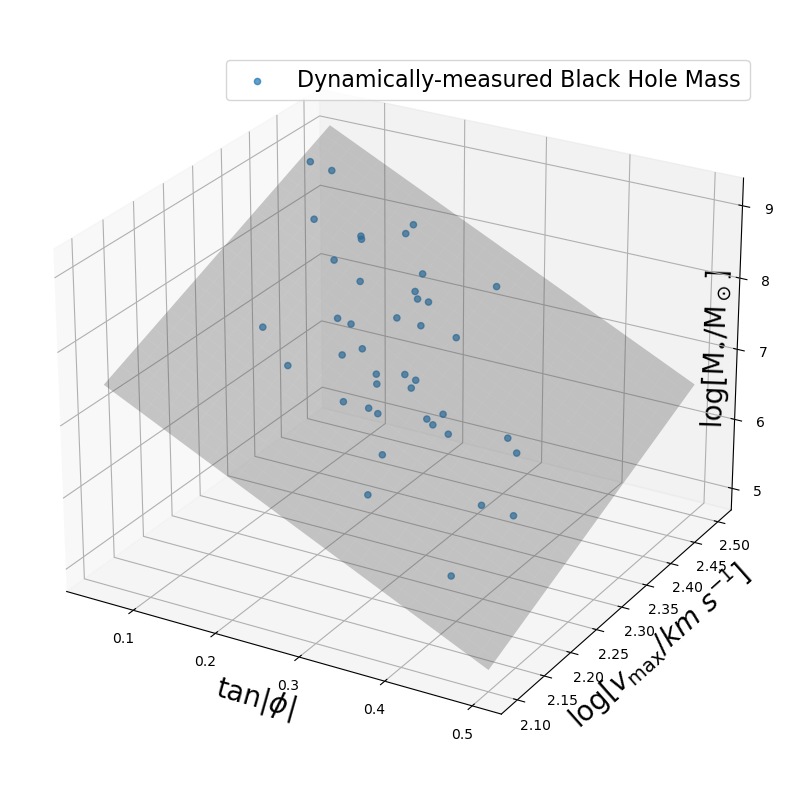

In [72]:
plot_3d(xx,yy,zz,c,elev=25)

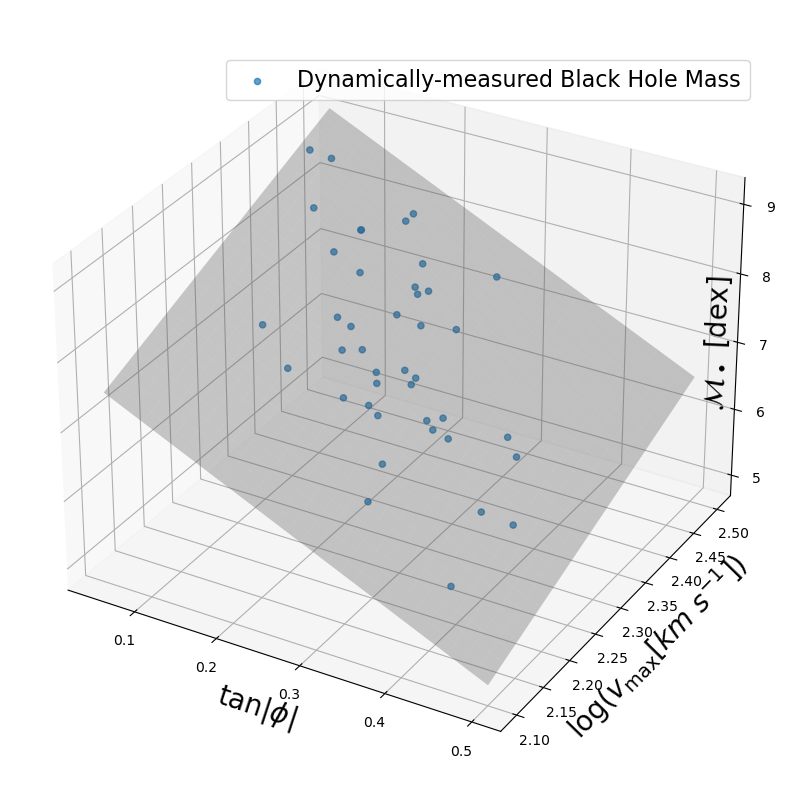

In [17]:
x=np.array(xx)
y=np.array(yy)
z=np.array(zz)
c=np.array(c)
    
fs=20
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
#ax.view_init(elev=elev,azim=azim,roll=roll)

plot=ax.plot_surface(x, y, z, alpha=0.3,color='grey')
ax.scatter(df_['tan_phi'],df_['log_v_max'],df_['M_BH'],alpha=0.7,label='Dynamically-measured Black Hole Mass')
    
ax.set_xlabel(r'$\tan|\phi|$',fontsize=fs)
#ax.set_ylabel(r'$\log [v_\mathrm{max}/km\ s^{-1}]$',fontsize=fs)
ax.set_ylabel(r'$\log (v_\mathrm{max}[km\ s^{-1}])$',fontsize=fs)
ax.set_zlabel(r'$\mathcal{M}_\bullet$ [dex]',fontsize=fs,labelpad=-30)
#ax.set_box_aspect([np.ptp(i) for i in (x,y,z)]) 
#fig.colorbar(plot, ax=ax)
plt.legend(fontsize=fs*0.8,loc='upper right',bbox_to_anchor=(0.975, 0.95))

In [85]:
from matplotlib import animation
from IPython.display import HTML

def init():
    ax.view_init(elev=10., azim=0)
    return [plot]


def animate(i):
    ax.view_init(elev=10., azim=i)
    return [plot]


# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)


# Save
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [86]:
HTML(anim.to_html5_video())

In [87]:
anim.save('test_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [89]:
# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=15,
                                 metadata=dict(artist='Me'),
                                 bitrate=1800)
anim.save('test_animation.gif', writer=writer)

In [18]:
def scatter_residual(x, y, xerr, fmt, alpha, label, ax, ax_histx1, ax_histx2, bins=12):
    # no labels
    ax_histx1.tick_params(axis="x", labelbottom=False)
    ax_histx2.tick_params(axis="x", labelbottom=False)
    # the scatter plot:
    ax.errorbar(x,y,xerr=xerr,fmt=fmt,ecolor='grey',capsize=3, alpha=alpha,label=label)

    # x hist
    #w = 1/xerr**2
    num,edges=np.histogram(x,bins)
    #hist, _ = np.histogram(x, bins=edges, weights=residual*w/w.mean())
    hist, _ = np.histogram(x, bins=edges, weights=(y-x))
    ax_histx2.stairs(hist/num,edges,lw=3,alpha=alpha)

    hist, _ = np.histogram(x, bins=edges, weights=np.sqrt((y-x)**2))
    ax_histx1.stairs(hist/num,edges,lw=3,alpha=alpha)

In [22]:
paras=['tan_phi','log_v_max']

if paras[-1]!='M_BH':
    paras.append('M_BH')

paras.append('M_BH_std')

obs = df[paras].dropna(axis='index',how='any')

print(len(obs))

y=obs['M_BH'].to_numpy()
yerr=obs['M_BH_std'].to_numpy()

x=[]
for i in range(len(paras)-(2)):
    x.append(obs.iloc[:,i].to_numpy())

y_pred=phi_v_normalized_relation(*x)

42


N-D relation wrmse: 0.3195867016049452
1-D relation wrmse: 0.4058537080339953
N-D relation wrmse: 0.3195867016049452
1-D relation wrmse: 0.4278506220992225


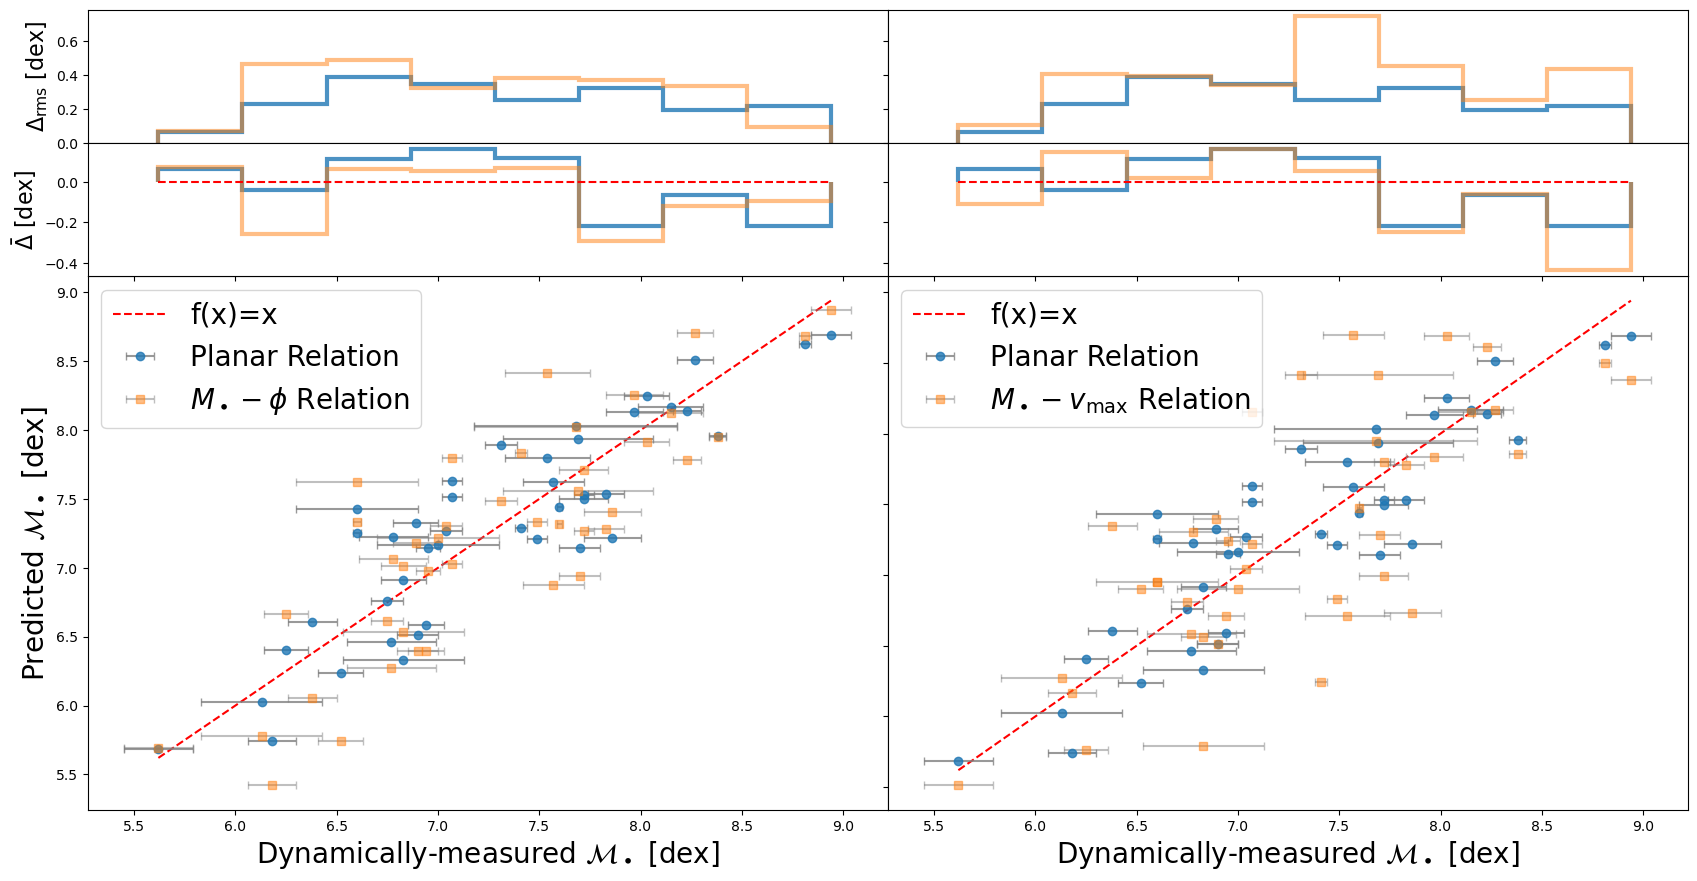

In [48]:
# Start with a square Figure.
fig = plt.figure(figsize=(20,10))
fs=20
bins=8
label='Planar Relation'
labelamp=1.
# Add a gridspec
gs = fig.add_gridspec(3, 2,  height_ratios=(1, 1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0, hspace=0)
# Create the Axes.
ax20 = fig.add_subplot(gs[2, 0])
ax21 = fig.add_subplot(gs[2, 1])

ax_histx00 = fig.add_subplot(gs[0, 0], sharex=ax20)
ax_histx10 = fig.add_subplot(gs[1, 0], sharex=ax20)

ax_histx01 = fig.add_subplot(gs[0, 1], sharex=ax21, sharey=ax_histx00)
ax_histx11 = fig.add_subplot(gs[1, 1], sharex=ax21, sharey=ax_histx10)

ax21.tick_params(axis='y', which='both',labelleft=False)
ax_histx10.tick_params(axis='x', which='both',labelbottom=False)
ax_histx11.tick_params(axis='x', which='both',labelbottom=False)
ax_histx11.tick_params(axis='y', which='both',labelleft=False)
ax_histx01.tick_params(axis='y', which='both',labelleft=False)

# Draw the f(x)=x line
minrange=np.array([y.min(),y_pred.min()]).min()
maxrange=np.array([y.max(),y_pred.max()]).max()
ax20.plot(np.linspace(minrange,maxrange),np.linspace(minrange,maxrange),label='f(x)=x',c='r',ls='--')
ax21.plot(np.linspace(minrange,maxrange),np.linspace(minrange,maxrange),label='f(x)=x',c='r',ls='--')
ax_histx10.plot(np.linspace(minrange,maxrange),np.zeros(len(np.linspace(minrange,maxrange))),c='r',ls='--')
ax_histx11.plot(np.linspace(minrange,maxrange),np.zeros(len(np.linspace(minrange,maxrange))),c='r',ls='--')

# Draw the scatter plot and marginals.
## new relation
scatter_residual(y,y_pred,yerr,'o',0.8,label,
                     ax20, ax_histx00, ax_histx10, bins=bins)
scatter_residual(y,y_pred,yerr,'o',0.8,label,
                     ax21, ax_histx01, ax_histx11, bins=bins)

## reference relation
reference_relation = old_relations.m_phi_relation
reference = 'tan_phi'
y_pred_ref=reference_relation(obs[reference])
scatter_residual(y,y_pred_ref,yerr,'s',0.5,r'$M_\bullet - \phi$ Relation',
                    ax20, ax_histx00, ax_histx10, bins=bins)

w = 1/yerr**2
#print('obs rmse:',rmse(y,y_pred))
print('N-D relation wrmse:',functions.wrmse(y,y_pred,w))
print('1-D relation wrmse:',functions.wrmse(y,y_pred_ref,1/yerr**2))

reference_relation = old_relations.m_vmax_relation
reference = 'log_v_max'
y_pred_ref=reference_relation(obs[reference])
scatter_residual(y,y_pred_ref,yerr,'s',0.5,r'$M_\bullet - v_\mathrm{max}$ Relation',
                    ax21, ax_histx01, ax_histx11, bins=bins)

w = 1/yerr**2
#print('obs rmse:',rmse(y,y_pred))
print('N-D relation wrmse:',functions.wrmse(y,y_pred,w))
print('1-D relation wrmse:',functions.wrmse(y,y_pred_ref,1/yerr**2))

ax20.set_xlabel(r'Dynamically-measured $\mathcal{M}_\bullet$ [dex]',fontsize=fs)
ax21.set_xlabel(r'Dynamically-measured $\mathcal{M}_\bullet$ [dex]',fontsize=fs)
ax20.set_ylabel(r'Predicted $\mathcal{M}_\bullet$ [dex]',fontsize=fs)

ax_histx10.set_ylabel(r'$\bar{\Delta}$ [dex]',fontsize=fs*0.8)
ax_histx00.set_ylabel(r'$\Delta_\mathrm{rms}$ [dex]',fontsize=fs*0.8)

ax20.legend(fontsize=fs*labelamp,loc='upper left')
ax21.legend(fontsize=fs*labelamp,loc='upper left')
plt.show()